In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plt.rcParams.update({
#     'font.size': 16,           # Base font size
#     'axes.titlesize': 16,      # Title font
#     'axes.labelsize': 15,      # X and Y label font
#     'xtick.labelsize': 14,     # X tick labels
#     'ytick.labelsize': 14,     # Y tick labels
#     'legend.fontsize': 13,     # Legend font
# })

plt.rcParams.update({
    'font.size': 17,           # Base font size
    'axes.titlesize': 17,      # Title font
    'axes.labelsize': 15,      # X and Y label font
    'xtick.labelsize': 18,     # X tick labels
    'ytick.labelsize': 18,     # Y tick labels
    'legend.fontsize': 13,     # Legend font
})

In [28]:
# | Mislead | Score | Guessing last loc              |
# | ------- | ----- | ------------------------------ |
# | 5       | 55    | 12/45, rest are model collapse |
# | 10      | 58    | 14/42, rest are model collapse |
# | 20      | 66    | 10/34, rest are model collapse |
# | 50      | 76    | 13/24, rest are model collapse |

# x = [5,10,20,50]
# gpt4 = [51, 50, 45, 49]
# gpt4_ll = [20/49, 17/50, 21/55, 19/51]
# gpt4_collapse = [24/49, 30/50, 31/55, 32/51]
# gpt4_other = [5/49, 3/50, 3/55, 0/51]


# dr1 = [55, 58, 66, 76]
# dr1_ll = [7/45, 10/42, 9/34, 11/24]
# dr1_collapse = [33/45, 28/42, 24/34, 11/24]
# dr1_other = [5/45, 4/42, 1/34, 2/24]

In [29]:
x = [5, 10, 20, 30, 40, 50, 60, 70, 80]
gpt4 = [51, 50, 45, 32, 36, 49, 40, 36, 38]
gpt4_error = np.array([100-x for x in gpt4])
gpt4_collapse = np.array([24, 30, 31, 17, 18, 32, 16, 20, 21])
gpt4_ll = np.array([20, 17, 21, 23, 30, 19, 29, 26, 28]) 
gpt4_other = np.array([5, 3, 3, 28, 16, 0, 15, 18, 13]) 



gpt4_holes = np.array([33, 28, 27, 31, 40, 45, 50, 41, 37])
# gpt4_collapse[gpt4_error == 0] = 0
# gpt4_ll[gpt4_error == 0] = 0
# gpt4_other[gpt4_error == 0] = 0    

In [30]:
dr1 = [55, 58, 66, 75, 76, 76, 80, 83, 72]
dr1_error = np.array([100-x for x in dr1])
dr1_collapse = np.array([33, 28, 24, 15, 17, 11, 12, 14, 19])
dr1_ll = np.array([7, 10, 9, 7, 7, 11, 7, 3, 5]) 
dr1_other = np.array([5, 4, 1, 3, 0, 2, 1, 0, 4]) 

# dr1_collapse[dr1_error == 0] = 0
# dr1_ll[dr1_error == 0] = 0
# dr1_other[dr1_error == 0] = 0


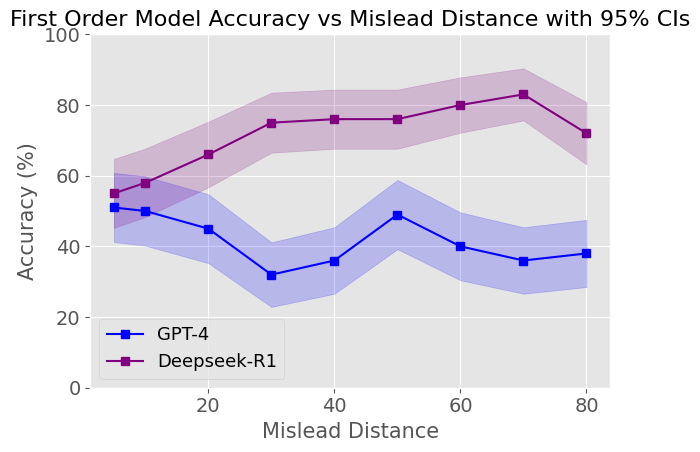

In [31]:
# plt.ylim(0, 100)
# plt.plot(x, gpt4, label="GPT-4", color='blue', marker='s')



# plt.plot(x, dr1, label="Deepseek-R1", color='purple', marker='s')


# plt.title("Model Accuracy vs Mislead Distance")
# plt.xlabel("Mislead Distance")
# plt.ylabel("Accuracy")
# plt.legend()

# plt.show()
n = 100  # sample size for each

def compute_ci(acc, n=100, z=1.96):
    p = np.array(acc) / 100
    se = np.sqrt(p * (1 - p) / n)
    ci = z * se * 100  # convert back to percentage scale
    return ci

# Compute 95% confidence intervals
gpt4_ci = compute_ci(gpt4, n)
dr1_ci = compute_ci(dr1, n)

# Plot
gpt4 = np.array(gpt4)
dr1 = np.array(dr1)

plt.plot(x, gpt4, label="GPT-4", color='blue', marker='s')
plt.fill_between(x, gpt4 - gpt4_ci, gpt4 + gpt4_ci, color='blue', alpha=0.2)

plt.plot(x, dr1, label="Deepseek-R1", color='purple', marker='s')
plt.fill_between(x, dr1 - dr1_ci, dr1 + dr1_ci, color='purple', alpha=0.2)

plt.ylim(0, 100)
plt.xlabel("Mislead Distance")
plt.ylabel("Accuracy (%)")
plt.title("First Order Model Accuracy vs Mislead Distance with 95% CIs")
plt.legend()
plt.tight_layout()
plt.savefig("figures/misleadfirstorder.pdf", format='pdf', bbox_inches='tight')
plt.show()

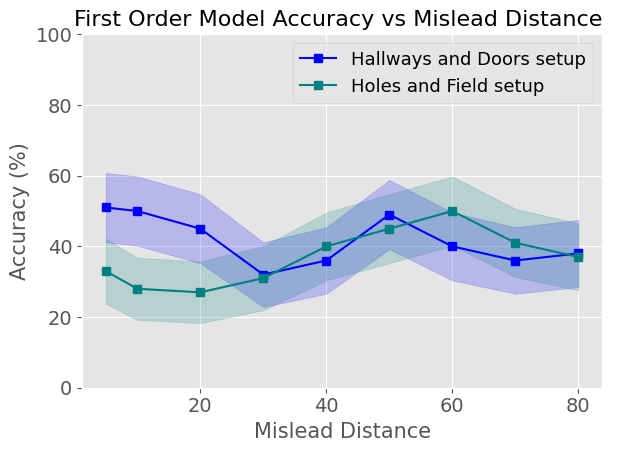

In [32]:
n = 100  # sample size for each

def compute_ci(acc, n=100, z=1.96):
    p = np.array(acc) / 100
    se = np.sqrt(p * (1 - p) / n)
    ci = z * se * 100  # convert back to percentage scale
    return ci

# Compute 95% confidence intervals
gpt4_ci = compute_ci(gpt4, n)
dr1_ci = compute_ci(gpt4_holes, n)

# Plot
gpt4 = np.array(gpt4)
dr1 = np.array(dr1)

plt.plot(x, gpt4, label="Hallways and Doors setup", color='blue', marker='s')
plt.fill_between(x, gpt4 - gpt4_ci, gpt4 + gpt4_ci, color='blue', alpha=0.2)

plt.plot(x, gpt4_holes, label="Holes and Field setup", color='teal', marker='s')
plt.fill_between(x, gpt4_holes - dr1_ci, gpt4_holes + dr1_ci, color='teal', alpha=0.2)

plt.ylim(0, 100)
plt.xlabel("Mislead Distance")
plt.ylabel("Accuracy (%)")
plt.title("First Order Model Accuracy vs Mislead Distance ")
plt.legend()
plt.tight_layout()
plt.savefig("figures/misleadholes.pdf", format='pdf', bbox_inches='tight')
plt.show()

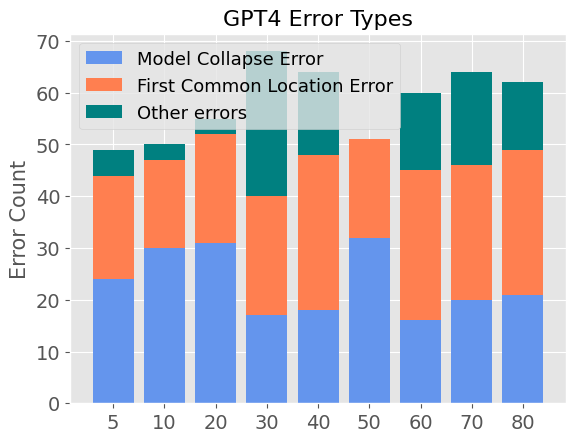

In [33]:
# Plot
# x = ["GPT4", "Deepseek-R1"]
x_new = [str(i) for i in x]
plt.bar(x_new, gpt4_collapse, color='cornflowerblue', label='Model Collapse Error')
plt.bar(x_new, gpt4_ll, bottom=gpt4_collapse, color='coral', label='First Common Location Error')
plt.bar(x_new, gpt4_other, bottom=np.array(gpt4_ll)+np.array(gpt4_collapse), color='teal', label = 'Other errors')
plt.ylabel('Error Count')
plt.title('GPT4 Error Types')
plt.legend()
plt.show()

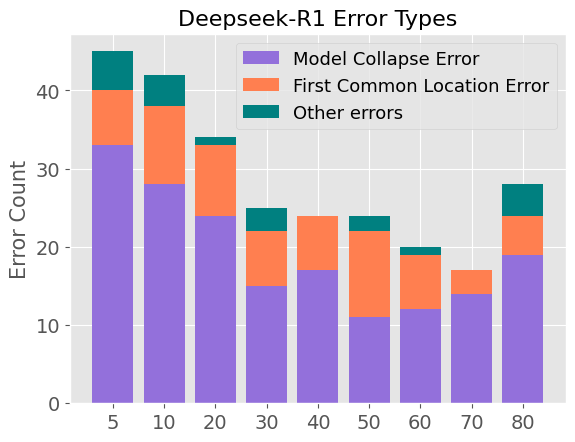

In [34]:
# Plot
# x = ["GPT4", "Deepseek-R1"]
x_new = [str(i) for i in x]
plt.bar(x_new, dr1_collapse, color='mediumpurple', label='Model Collapse Error')
plt.bar(x_new, dr1_ll, bottom=dr1_collapse, color='coral', label='First Common Location Error')
plt.bar(x_new, dr1_other, bottom=np.array(dr1_ll)+np.array(dr1_collapse), color='teal', label = 'Other errors')
plt.ylabel('Error Count')
plt.title('Deepseek-R1 Error Types')
plt.legend()
plt.show()

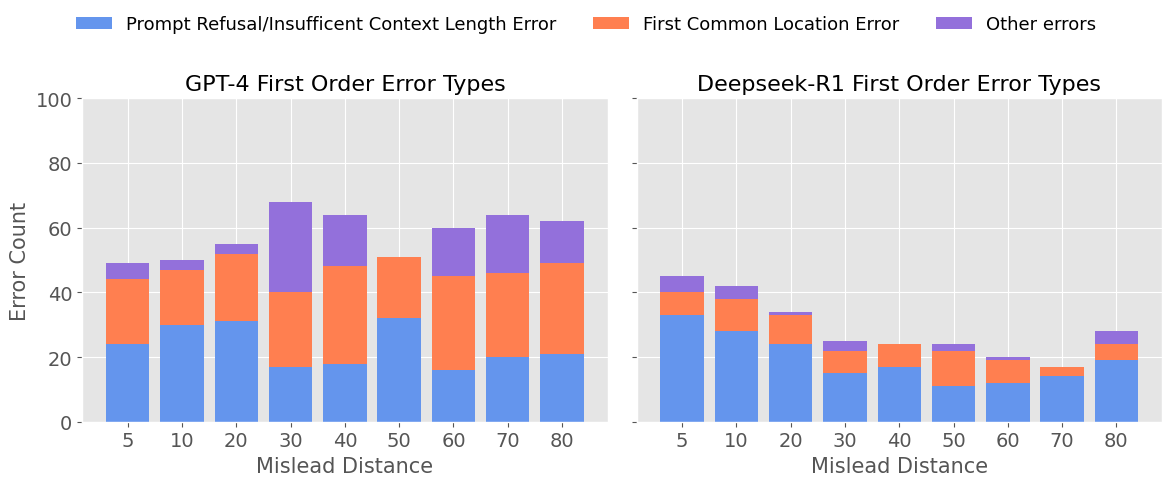

In [35]:
# Set up side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].set_xlabel('Mislead Distance')
axs[1].set_xlabel('Mislead Distance')


# GPT-4 plot
axs[0].bar(x_new, gpt4_collapse, color='cornflowerblue', label='Prompt Refusal/Insufficent Context Length Error')
axs[0].bar(x_new, gpt4_ll, bottom=gpt4_collapse, color='coral', label='First Common Location Error')
axs[0].bar(x_new, gpt4_other, bottom=np.array(gpt4_ll)+np.array(gpt4_collapse), color='mediumpurple', label='Other errors')
axs[0].set_ylabel('Error Count')
axs[0].set_title('GPT-4 First Order Error Types')

# Deepseek-R1 plot
axs[1].bar(x_new, dr1_collapse, color='cornflowerblue')  # use same color as GPT-4 for consistency
axs[1].bar(x_new, dr1_ll, bottom=dr1_collapse, color='coral')
axs[1].bar(x_new, dr1_other, bottom=np.array(dr1_ll)+np.array(dr1_collapse), color='mediumpurple')
axs[1].set_title('Deepseek-R1 First Order Error Types')

# Shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False)

# Final formatting
plt.ylim(0, 100)
plt.tight_layout(rect=[0, 0, 1, 0.9])  # leave space at top for legend
plt.savefig("figures/firstordererrortypes.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [36]:
# plt.plot(x, gpt4, label="GPT-4", color='blue', marker='s')
# plt.plot(x, [100.0*(x) for x in gpt4_ll], label="GPT-4 First Guess Error Rate",
#          color='blue', linestyle = '--', marker='o')


# plt.plot(x, dr1, label="Deepseek-R1", color='red', marker='s')
# plt.plot(x, [100*x for x in dr1_ll], label="Deepseek-R1 First Guess Error Rate",
#          color='red', linestyle = '--', marker='o')

# plt.title("Model Accuracy vs Mislead Distance")
# plt.xlabel("Mislead Distance")
# plt.ylabel("Accuracy")
# plt.legend()

# plt.show()

In [37]:
x = [3,10,20, 40]

gpt4 = [48, 45, 44, 45]
gpt4_wm = [33, 47, 44, 56]

dr1 = [74, 72, 78, 75]
dr1_wm = [67, 65, 72, 73]


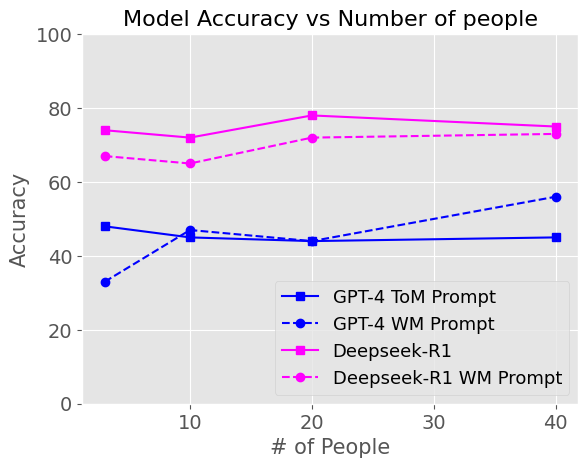

In [38]:
plt.ylim(0, 100)
plt.plot(x, gpt4, label="GPT-4 ToM Prompt", color='blue', marker='s')
plt.plot(x, gpt4_wm, label="GPT-4 WM Prompt",
         color='blue', linestyle = '--', marker='o')

plt.plot(x, dr1, label="Deepseek-R1", color='magenta', marker='s')
plt.plot(x, dr1_wm, label="Deepseek-R1 WM Prompt",
         color='magenta', linestyle = '--', marker='o')

plt.title("Model Accuracy vs Number of people")
plt.xlabel("# of People")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/numppl.pdf", format='pdf', bbox_inches='tight')
plt.show()

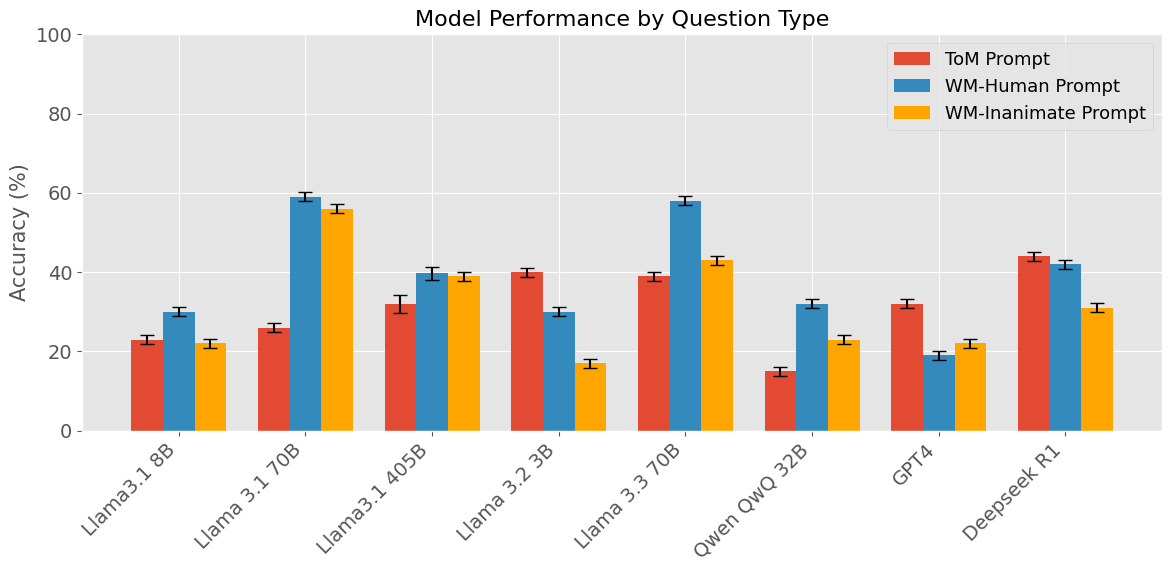

In [39]:
# # Data
# models = [
#     "GPT4",
#     "Llama 3.2 3B",
#     "Llama 3.3 70B",
#     "Llama3.1 405B",
#     "Llama 3.1 70B",
#     "Llama3.1 8B",
#     "Qwen QwQ 32B",
#     "Deepseek R1"
# ]

# tom = [32, 40, 39, 32, 26, 23, 15, 44]
# wm_humans = [19, 30, 58, 40, 59, 30, 32, 42]
# wm_inanimate = [22, 17, 43, 39, 56, 22, 23, 31]

# # Parameters
# x = np.arange(len(models))  # label locations
# width = 0.25  # bar width

# # Plot
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.bar(x - width, tom, width, label='ToM Question')
# ax.bar(x, wm_humans, width, label='WM Question Humans')
# ax.bar(x + width, wm_inanimate, width, label='WM Question Inanimate')

# # Labels and formatting
# ax.set_ylabel('Score')
# ax.set_title('Model Performance by Question Type')
# ax.set_xticks(x)
# ax.set_xticklabels(models, rotation=45, ha='right')
# ax.legend()

# plt.tight_layout()
# plt.show()

tom = [
    
    [22, 23, 24],     # Llama3.1 8B
    [25, 27, 26],     # Llama 3.1 70B
    [30, 32, 34],     # Llama3.1 405B
    [39, 41, 40],     # Llama 3.2 3B
    [38, 39, 40],     # Llama 3.3 70B
    [14, 16, 15],     # Qwen QwQ 32B
    [32, 33, 31],     # GPT4
    [43, 44, 45]      # Deepseek R1
]

wm_humans = [
    [29, 31, 30],
    [58, 60, 59],
    [38, 41, 40],
    [29, 31, 30],
    [57, 59, 58],
    [31, 33, 32],
    [18, 19, 20],
    [41, 43, 42]
]

wm_inanimate = [    
    [21, 23, 22],
    [55, 57, 56],
    [38, 40, 39],
    [16, 18, 17],
    [42, 44, 43],
    [22, 24, 23],
    [21, 22, 23],
    [30, 32, 31]
]

# Labels
models = [
    "Llama3.1 8B", "Llama 3.1 70B",  "Llama3.1 405B",  "Llama 3.2 3B",
    "Llama 3.3 70B", "Qwen QwQ 32B", "GPT4", "Deepseek R1"
]
x = np.arange(len(models))
width = 0.25

# Function to compute mean and 95% CI
def mean_and_ci(data):
    data = np.array(data)
    mean = data.mean()
    se = data.std(ddof=1) / np.sqrt(len(data))
    ci = 1.96 * se  # 95% CI half-width
    return mean, ci

# Compute means and CI for each group
tom_means, tom_err = zip(*[mean_and_ci(d) for d in tom])
wmh_means, wmh_err = zip(*[mean_and_ci(d) for d in wm_humans])
wmi_means, wmi_err = zip(*[mean_and_ci(d) for d in wm_inanimate])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, tom_means, width, yerr=tom_err, capsize=5, label='ToM Prompt')
ax.bar(x, wmh_means, width, yerr=wmh_err, capsize=5, label='WM-Human Prompt')
ax.bar(x + width, wmi_means, width, yerr=wmi_err, capsize=5, label='WM-Inanimate Prompt', color='orange')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance by Question Type')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylim(0, 100)
ax.legend()

plt.tight_layout()
plt.savefig("figures/tomwm2.pdf", format='pdf', bbox_inches='tight')
plt.show()

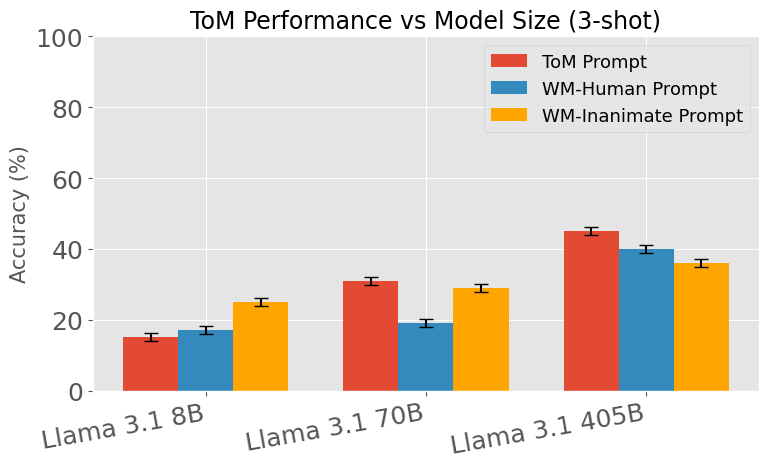

In [4]:
# # Data
# models = ["Llama 3.1 8B", "Llama 3.1 70B", "Llama 3.1 405B"]

# tom = [15, 31, 45]
# wm_humans = [17, 19, 40]
# wm_inanimate = [25, 29, 36]

# # Parameters
# x = np.arange(len(models))  # label locations
# width = 0.25  # bar width

# # Plot
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.bar(x - width, tom, width, label='ToM Question')
# ax.bar(x, wm_humans, width, label='WM Question Humans')
# ax.bar(x + width, wm_inanimate, width, label='WM Question Inanimate')

# # Labels and formatting
# ax.set_ylabel('Score')
# ax.set_title('Llama 3.1 Instruct Model Family Performance by Question Type(3-shot)')
# ax.set_xticks(x)
# ax.set_xticklabels(models, rotation=45, ha='right')
# ax.legend()

# plt.tight_layout()
# plt.show()



tom = [
    [14, 15, 16],   # Llama 3.1 8B
    [30, 31, 32],   # Llama 3.1 70B
    [44, 45, 46]    # Llama 3.1 405B
]

wm_humans = [
    [16, 17, 18],
    [18, 19, 20],
    [39, 40, 41]
]

wm_inanimate = [
    [24, 25, 26],
    [28, 29, 30],
    [35, 36, 37]
]

models = ["Llama 3.1 8B", "Llama 3.1 70B", "Llama 3.1 405B"]
x = np.arange(len(models))
width = 0.25

# Function to compute mean and 95% CI
def mean_and_ci(data):
    data = np.array(data)
    mean = data.mean()
    se = data.std(ddof=1) / np.sqrt(len(data))
    ci = 1.96 * se
    return mean, ci

# Compute means and error bars
tom_means, tom_err = zip(*[mean_and_ci(d) for d in tom])
wmh_means, wmh_err = zip(*[mean_and_ci(d) for d in wm_humans])
wmi_means, wmi_err = zip(*[mean_and_ci(d) for d in wm_inanimate])

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, tom_means, width, yerr=tom_err, capsize=5, label='ToM Prompt')
ax.bar(x, wmh_means, width, yerr=wmh_err, capsize=5, label='WM-Human Prompt')
ax.bar(x + width, wmi_means, width, yerr=wmi_err, capsize=5, label='WM-Inanimate Prompt', color='orange')

# Labels and formatting
ax.set_ylabel('Accuracy (%)')
ax.set_title('ToM Performance vs Model Size (3-shot)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=10, ha='right')
ax.set_ylim(0, 100)
ax.legend()

plt.tight_layout()
plt.savefig("figures/llamafamily3shot.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [41]:
tom_prev = [32, 40, 39, 32, 26, 23, 15, 44]
wm_humans_prev = [19, 30, 58, 40, 59, 30, 32, 42]
wm_inanimate_prev = [22, 17, 43, 39, 56, 22, 23, 31]


llama_fam_tom = tom_prev[3:6]
llama_fam_humans = wm_humans_prev[3:6]
llama_fam_inan = wm_inanimate_prev[3:6]

# for i in range((len(llama_fam_tom))):
#     print(llama_fam_tom[i] - tom[i])
# print("---")    
# for i in range((len(llama_fam_tom))):
#     print(llama_fam_humans[i] - wm_humans[i])
# print("---")    
# for i in range((len(llama_fam_tom))):
#     print(llama_fam_inan[i] - wm_inanimate[i])

In [42]:
# Mislead second order

# GPT
# Mislead = 5: 33/100, 0 unkown
# Mislead = 10: 39/100, 0 unkown
# Mislead = 20: 32/100, 0 unkown
# Mislead = 50: 31/100, 0 unkown


# Deepseek:
# Mislead = 5: 48/100, 0 unkown
# Mislead = 10: 45/100, 0 unkown
# Mislead = 20: 46/100, 0 unkown
# Mislead = 50: 51/100, 0 unkown

# x = [5,10,20,50]
# gpt4_2 = [33, 39, 32, 31]
# gpt4_2_ll = [32/67, 25/61, 26/68, 39/69]

dr1_2 = [48, 45, 46, 51]
dr1_2_ll = [31/52, 38/55, 39/54, 25/49]


x = [5, 10, 20, 30, 40, 50, 60, 70, 80]
gpt4_2 = [33, 39, 32, 47, 53, 31, 40, 37, 32]
gpt4_2_error = np.array([100-x for x in gpt4_2])
gpt4_2_collapse = np.array([32, 25, 26, 9, 7, 29, 40, 37, 40])
gpt4_2_ll = np.array([25, 25, 30, 25, 27, 29, 19, 26, 25]) 
gpt4_2_other = np.array([10, 11, 12, 19, 13, 11, 1, 0, 3]) 

# gpt4_2_collapse[gpt4_2_error == 0] = 0
# gpt4_2_ll[gpt4_2_error == 0] = 0
# gpt4_2_other[gpt4_2_error == 0] = 0



In [43]:
x = [5, 10, 20, 30, 40, 50, 60, 70, 80]
dr1_2 = [48, 45, 46, 55, 59, 51, 56, 58, 54]
dr1_2_error = np.array([100-x for x in dr1_2])
dr1_2_collapse = np.array([31, 38, 39, 35, 24, 25, 28, 30, 34]) 
dr1_2_ll = np.array([13, 14, 10, 5, 12, 20, 13, 7, 5]) 
dr1_2_other = np.array([8, 3, 5, 5, 5, 4, 3, 5, 7]) 

# dr1_2_collapse[dr1_2_error == 0] = 0
# dr1_2_ll[dr1_2_error == 0] = 0
# dr1_2_other[dr1_2_error == 0] = 0

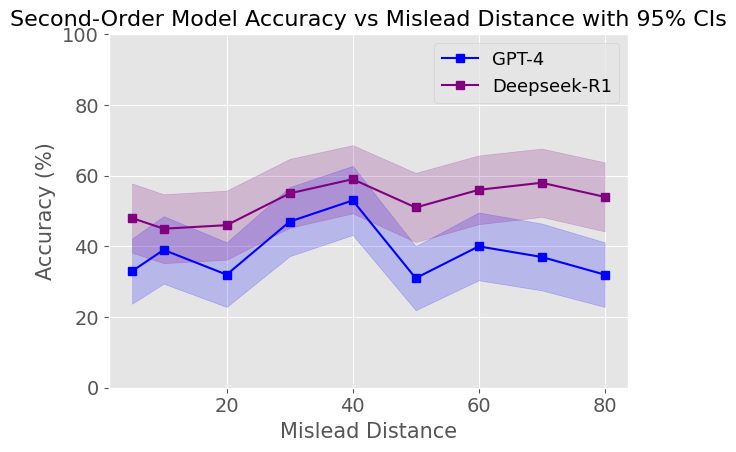

In [44]:
n = 100  # sample size for each

def compute_ci(acc, n=100, z=1.96):
    p = np.array(acc) / 100
    se = np.sqrt(p * (1 - p) / n)
    ci = z * se * 100  # convert back to percentage scale
    return ci

# Compute 95% confidence intervals
gpt4_2_ci = compute_ci(gpt4_2, n)
dr1_2_ci = compute_ci(dr1_2, n)

# Plot
gpt4_2 = np.array(gpt4_2)
dr1_2 = np.array(dr1_2)

plt.plot(x, gpt4_2, label="GPT-4", color='blue', marker='s')
plt.fill_between(x, gpt4_2 - gpt4_2_ci, gpt4_2 + gpt4_2_ci, color='blue', alpha=0.2)

plt.plot(x, dr1_2, label="Deepseek-R1", color='purple', marker='s')
plt.fill_between(x, dr1_2 - dr1_2_ci, dr1_2 + dr1_2_ci, color='purple', alpha=0.2)

plt.ylim(0, 100)
plt.xlabel("Mislead Distance")
plt.ylabel("Accuracy (%)")
plt.title("Second-Order Model Accuracy vs Mislead Distance with 95% CIs")
plt.legend()
plt.tight_layout()
plt.savefig("figures/misleadsecondorder.pdf", format='pdf', bbox_inches='tight')

plt.show()

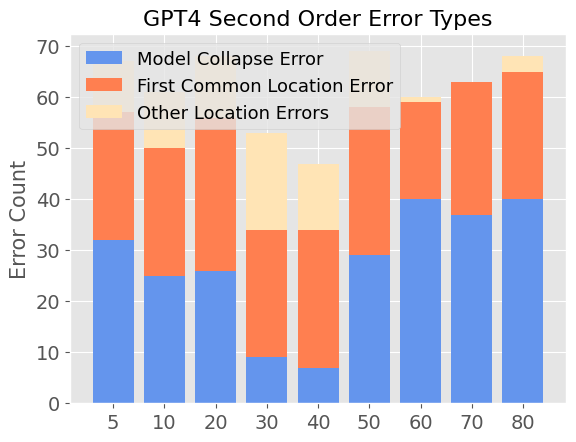

In [45]:
x_new = [str(i) for i in x]
plt.bar(x_new, gpt4_2_collapse, color='cornflowerblue', label='Model Collapse Error')
plt.bar(x_new, gpt4_2_ll, bottom=gpt4_2_collapse, color='coral', label='First Common Location Error')
plt.bar(x_new, gpt4_2_other, bottom=np.array(gpt4_2_ll)+np.array(gpt4_2_collapse), color='moccasin', label = 'Other Location Errors')
plt.ylabel('Error Count')
plt.title('GPT4 Second Order Error Types')
plt.legend()
plt.show()

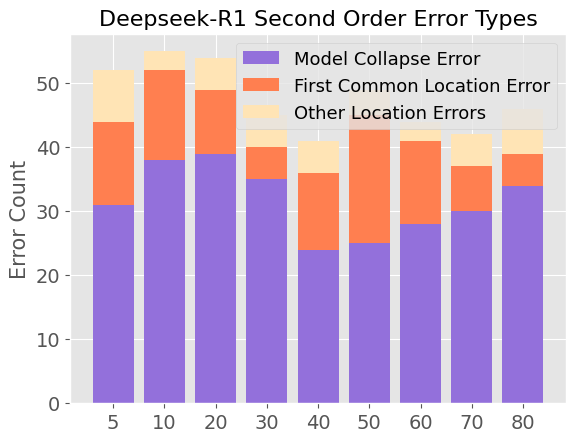

In [46]:
x_new = [str(i) for i in x]
plt.bar(x_new, dr1_2_collapse, color='mediumpurple', label='Model Collapse Error')
plt.bar(x_new, dr1_2_ll, bottom=dr1_2_collapse, color='coral', label='First Common Location Error')
plt.bar(x_new, dr1_2_other, bottom=np.array(dr1_2_ll)+np.array(dr1_2_collapse), color='moccasin', label = 'Other Location Errors')
plt.ylabel('Error Count')
plt.title('Deepseek-R1 Second Order Error Types')
plt.legend()
plt.show()

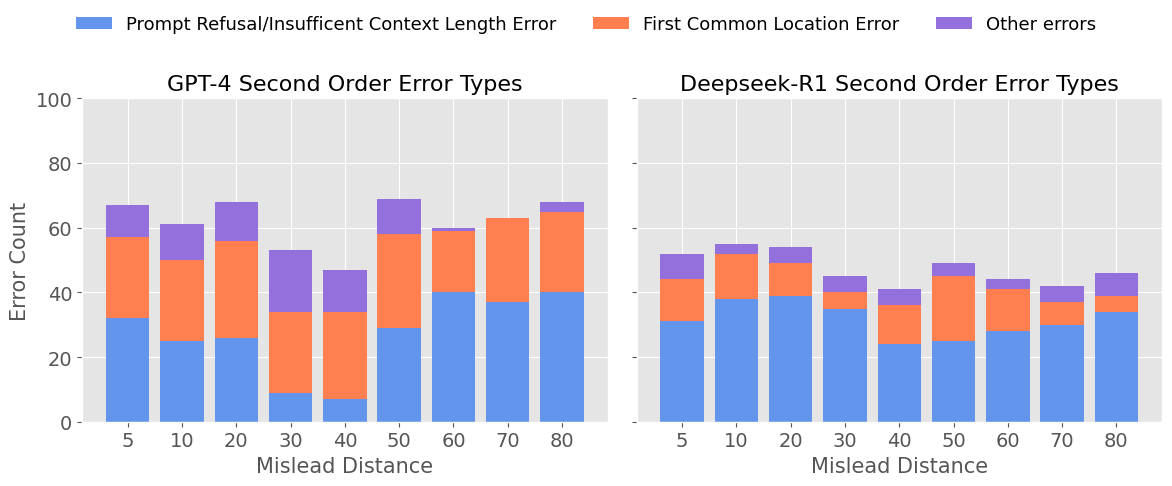

In [47]:
# Set up side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].set_xlabel('Mislead Distance')
axs[1].set_xlabel('Mislead Distance')

# GPT-4 plot
axs[0].bar(x_new, gpt4_2_collapse, color='cornflowerblue', label='Prompt Refusal/Insufficent Context Length Error')
axs[0].bar(x_new, gpt4_2_ll, bottom=gpt4_2_collapse, color='coral', label='First Common Location Error')
axs[0].bar(x_new, gpt4_2_other, bottom=np.array(gpt4_2_ll)+np.array(gpt4_2_collapse), color='mediumpurple', label='Other errors')
axs[0].set_ylabel('Error Count')
axs[0].set_title('GPT-4 Second Order Error Types')

# Deepseek-R1 plot
axs[1].bar(x_new, dr1_2_collapse, color='cornflowerblue')  # use same color as GPT-4 for consistency
axs[1].bar(x_new, dr1_2_ll, bottom=dr1_2_collapse, color='coral')
axs[1].bar(x_new, dr1_2_other, bottom=np.array(dr1_2_ll)+np.array(dr1_2_collapse), color='mediumpurple')
axs[1].set_title('Deepseek-R1 Second Order Error Types')

# Shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, frameon=False)

# Final formatting
plt.ylim(0, 100)
plt.xlabel("Mislead Distance")
plt.tight_layout(rect=[0, 0, 1, 0.9])  # leave space at top for legend
plt.savefig("figures/secondordererrors.pdf", format='pdf', bbox_inches='tight')
plt.show()